# **EDA on Netflix Movies & TV Shows Dataset**

---



This project explores the Netflix dataset, which contains details about movies and TV shows available on the platform. The objective is to perform exploratory data analysis (EDA) to uncover insights about content trends, genres, ratings, and country-wise availability.

#**1. Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)

# **2. Reading Our Dataset**

In [ ]:
df = pd.read_csv('netflix_titles.csv')

# **3. Inspecting Dataset**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **4. Handling Missing Values**

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.fillna({'rating' : 'Unavailable', 'cast' : 'Unavailable', 'country' : 'Unavailable', 'director' : 'Unknown'}, inplace=True)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')


In [ ]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
most_recent_entry_date=df['date_added'].max()
df.fillna({'date_added' : most_recent_entry_date}, inplace=True)

In [ ]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **5. Additional Data Cleaning**

In [ ]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **6. Visualisations**

**Movies vs TV Shows**

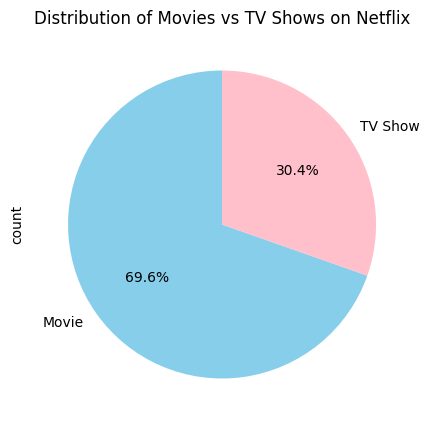

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','pink'], startangle=90)
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.show()

**Top 10 Countries**

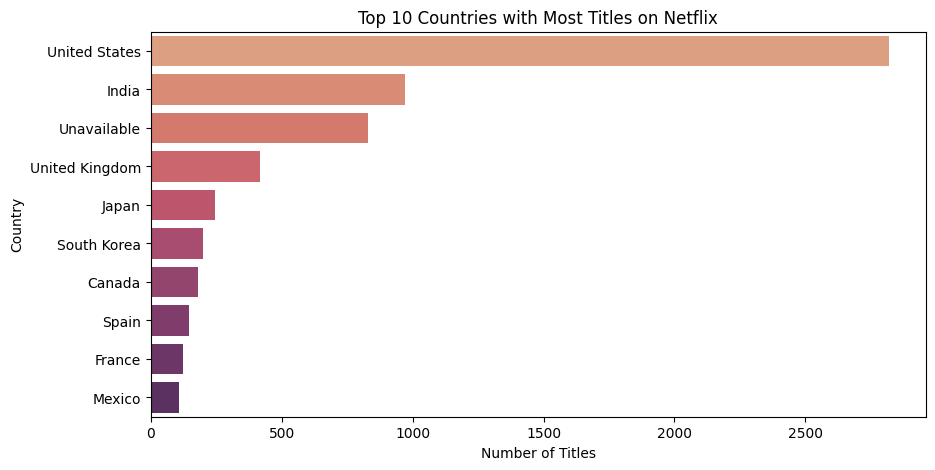

In [ ]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,  hue=top_countries.index, palette='flare', legend=False)
plt.title("Top 10 Countries with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

**Number of Releases per year**

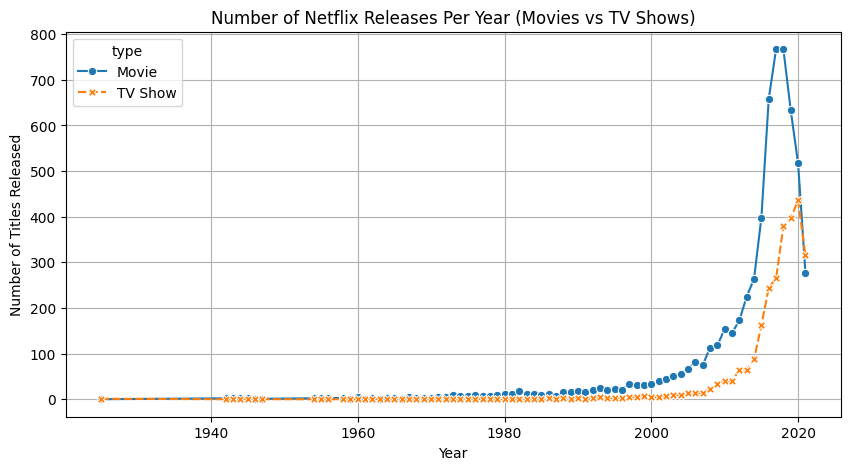

In [ ]:
yearly_data = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
sns.lineplot(data=yearly_data, markers=True)
plt.title("Number of Netflix Releases Per Year (Movies vs TV Shows)")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.legend(title='type')
plt.grid(True)
plt.show()

**Top 5 Actors**

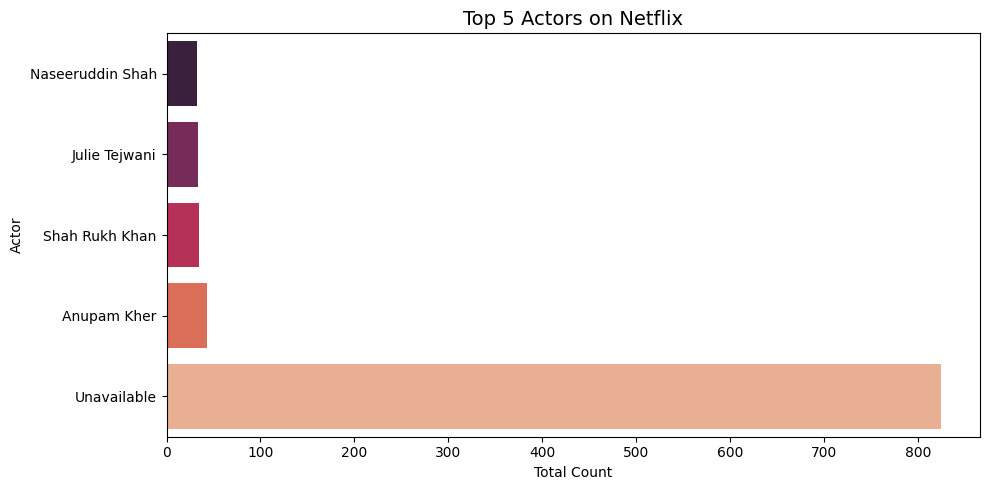

In [ ]:
df['cast'] = df['cast'].fillna('No cast specified')
cast_df = df['cast'].str.split(',', expand=True).stack().to_frame(name='Actor')
cast_df = cast_df[cast_df['Actor'] != 'No cast specified']
cast_df['Actor'] = cast_df['Actor'].str.strip()
actors = cast_df['Actor'].value_counts().reset_index()
actors.columns = ['Actor', 'Total Count']
top5Actors = actors.head(5).sort_values(by='Total Count', ascending=True)
sns.barplot(x='Total Count', y='Actor', hue='Actor', data=top5Actors, palette='rocket')
plt.title('Top 5 Actors on Netflix', fontsize=14)
plt.xlabel('Total Count')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


**Top 10 genres**

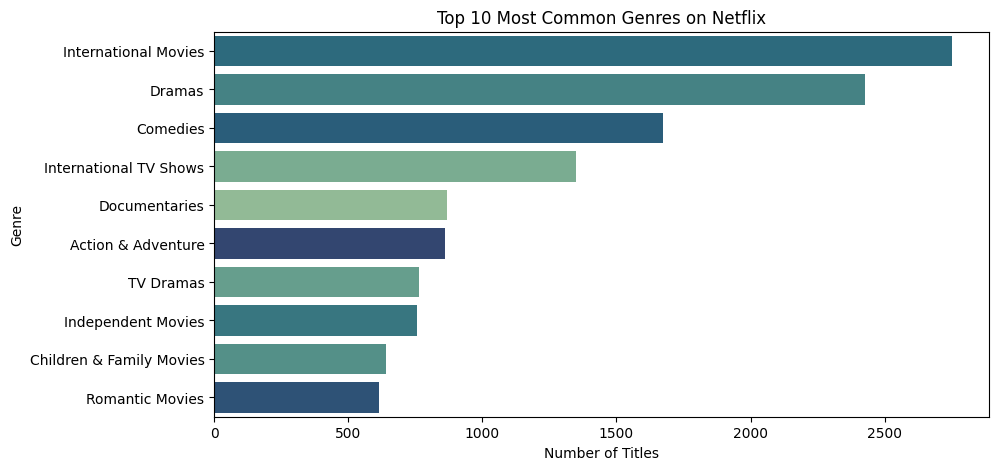

In [ ]:
genre_df = df['listed_in'].str.split(', ').explode()
top_10_genres = genre_df.value_counts().index[:10]
top_10_genre_df = genre_df[genre_df.isin(top_10_genres)]
sns.countplot(y=top_10_genre_df, order=top_10_genres, hue=top_10_genre_df, palette='crest')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

**Movie Duration**

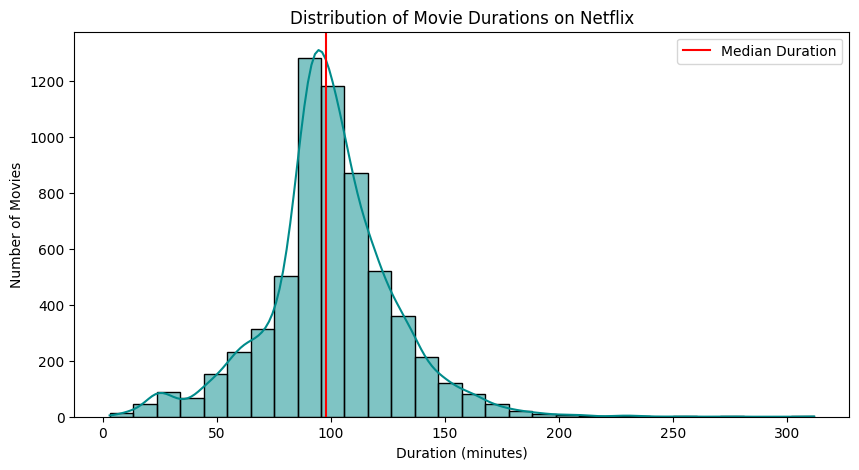

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_min'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='darkcyan')
plt.axvline(movies_df['duration_min'].median(), color='red', linestyle='-', label='Median Duration')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

**TV Show Seasons**

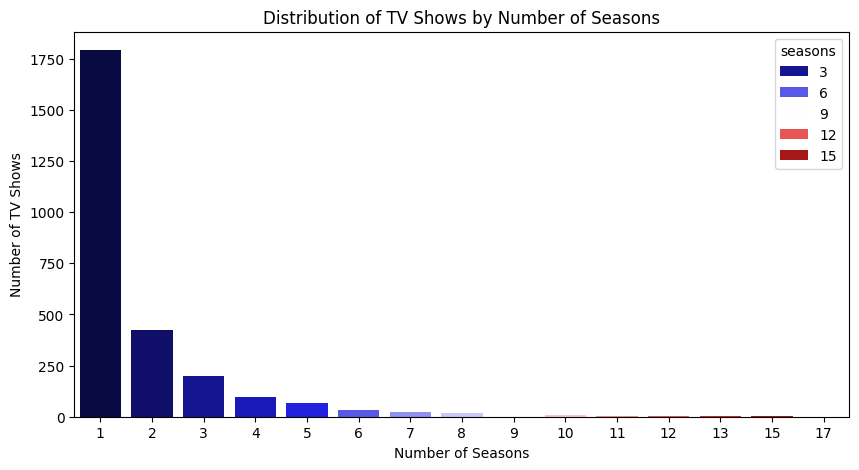

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show'].copy()
tv_shows_df['seasons'] = pd.to_numeric(tv_shows_df['duration'].str.replace(' Season', '').str.replace('s', ''), errors='coerce')

sns.countplot(x='seasons', hue='seasons', data=tv_shows_df, palette='seismic')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

**Ratings Distribution**

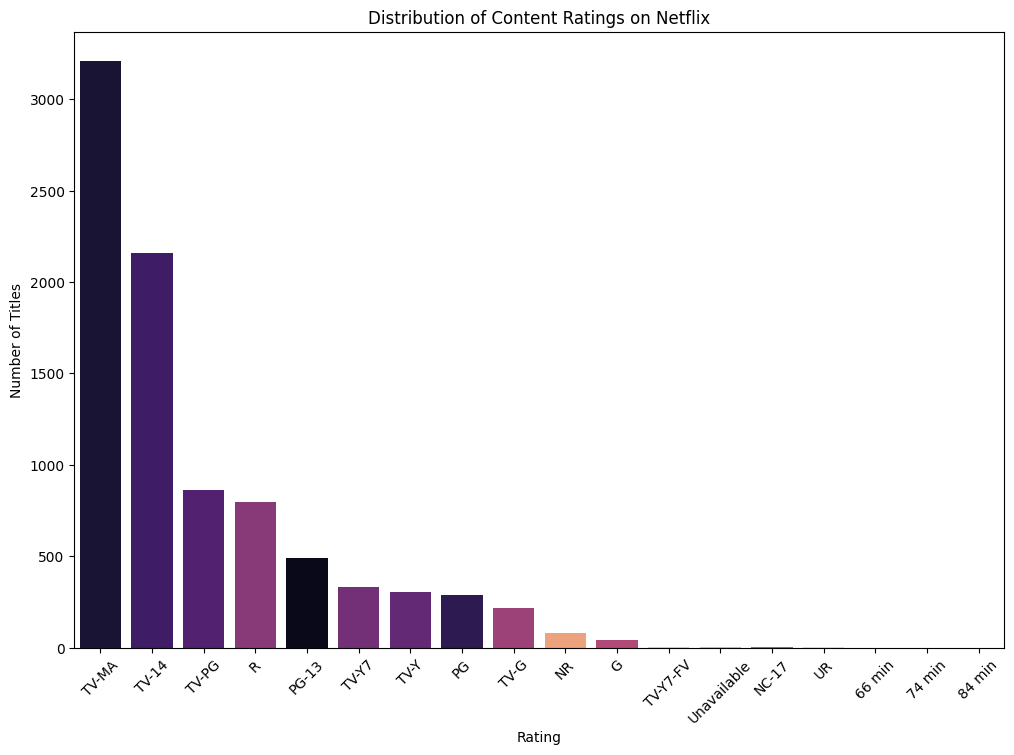

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', hue='rating', data=df, order=df['rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()